<a href="https://colab.research.google.com/github/serega-sergei/AndroidTest/blob/master/Siarhei_Siryk_Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project: Trees and Forests**

https://github.com/springboard-curriculum/guild-mle-projects/blob/main/Student_MLE_MiniProject_Trees_and_Forests.ipynb



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()

# Convert to a Pandas DataFrame
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')

In [5]:
# Split the dataset into training and test sets

# We'll use 80% for training and 20% for testing
# Set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% of data for testing
    random_state=10  # For reproducibility
)

# Print information about the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Verification of the split
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: (455, 30)
Test set shape: (114, 30)

Training set distribution:
target
1    0.61978
0    0.38022
Name: proportion, dtype: float64

Test set distribution:
target
1    0.657895
0    0.342105
Name: proportion, dtype: float64


In [14]:
# Display first 5 rows
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Target
y.head()

,target
0,0
1,0
2,0
3,0
4,0


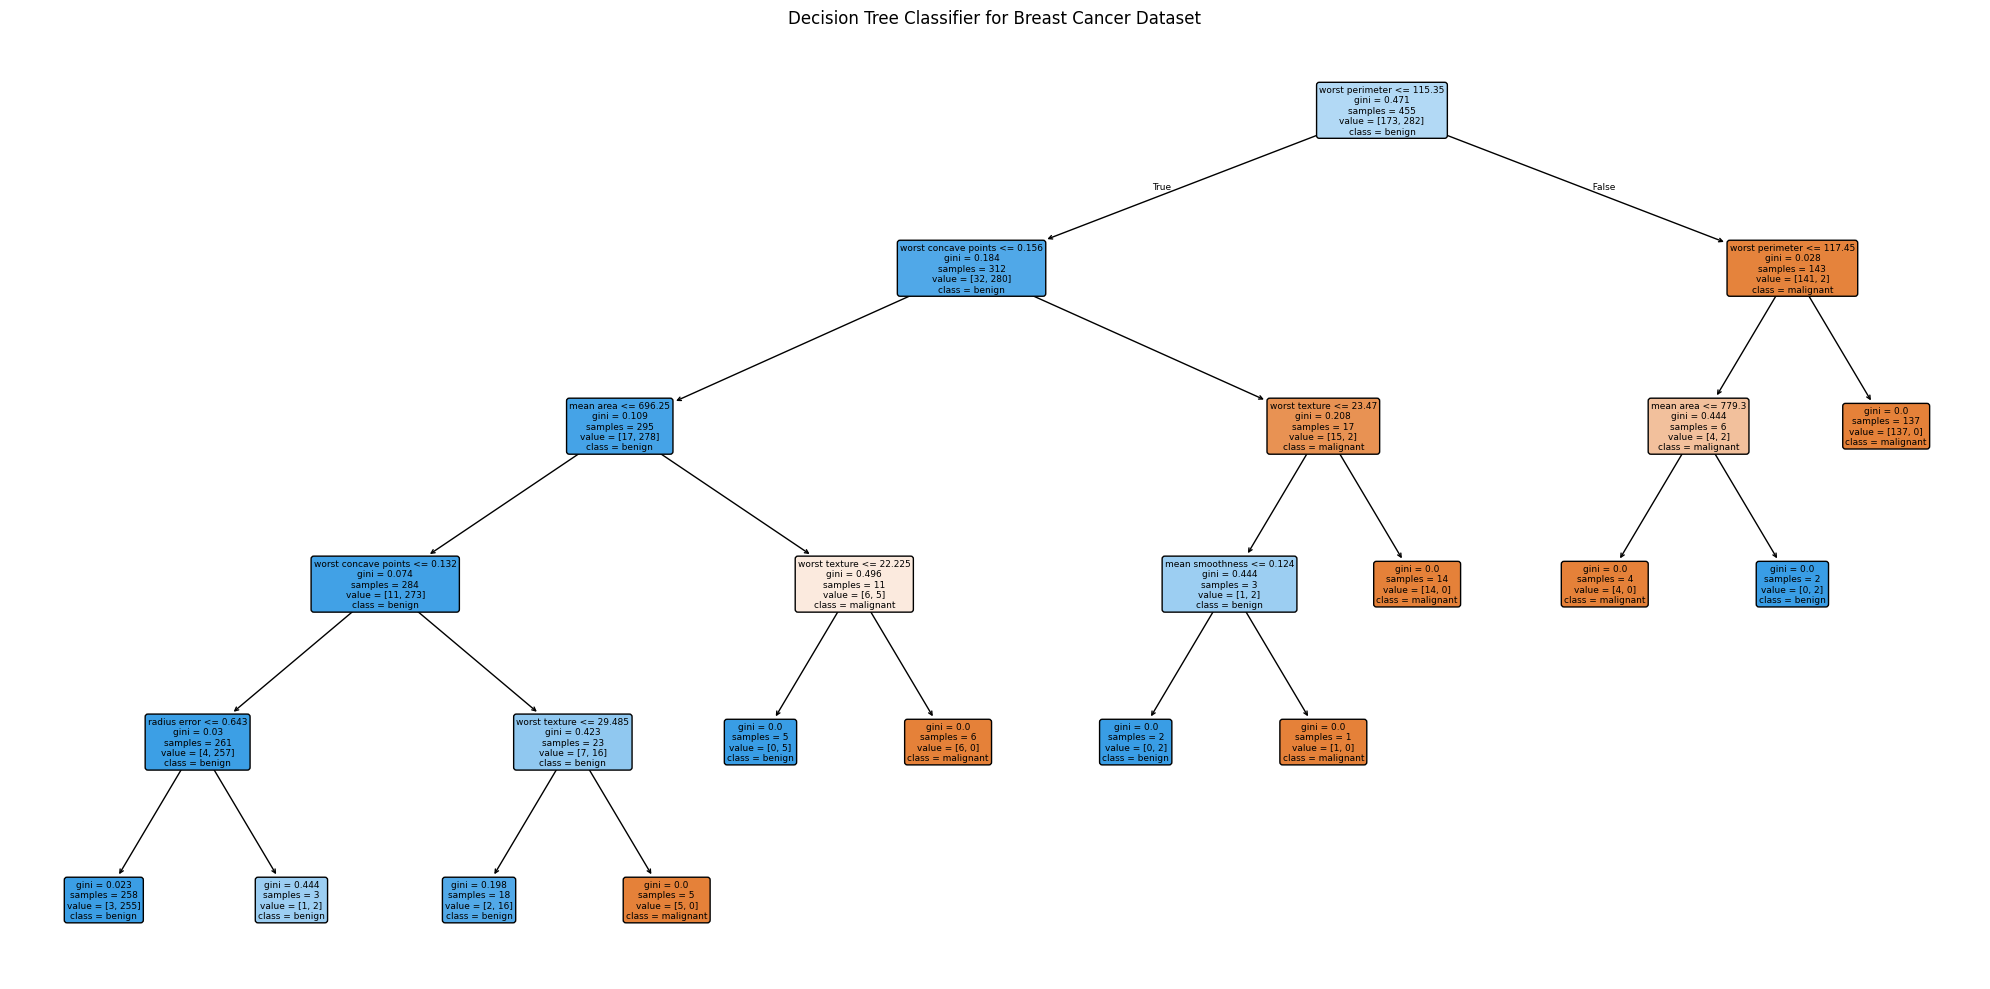

In [27]:
# Create a Decision Tree model

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
# We'll use some hyperparameters to control model complexity
dt_classifier = DecisionTreeClassifier(
    max_depth=5,  # Limit tree depth to prevent overfitting
    random_state=20  # For reproducibility
)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,
          feature_names=breast_cancer.feature_names,
          class_names=breast_cancer.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Classifier for Breast Cancer Dataset")
plt.tight_layout()
plt.show()


In [19]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,  # Maximum depth of the trees
    random_state=30  # For reproducibility
)

In [20]:
# Extract feature importances

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
})

# Sort features by importance in descending order
feature_importances_sorted = feature_importances.sort_values('importance', ascending=False)

Top 15 Most Important Features:
                 feature  importance
22       worst perimeter    0.179000
23            worst area    0.142825
27  worst concave points    0.121460
20          worst radius    0.084238
7    mean concave points    0.075036
6         mean concavity    0.063499
3              mean area    0.058291
0            mean radius    0.042328
13            area error    0.041112
26       worst concavity    0.024314
21         worst texture    0.021483
25     worst compactness    0.020378
2         mean perimeter    0.017812
5       mean compactness    0.013897
24      worst smoothness    0.012086


In [22]:
# Print feature importance

print("Top 15 Most Important Features:")
print(feature_importances_sorted.head(15))

Top 15 Most Important Features:
                 feature  importance
22       worst perimeter    0.179000
23            worst area    0.142825
27  worst concave points    0.121460
20          worst radius    0.084238
7    mean concave points    0.075036
6         mean concavity    0.063499
3              mean area    0.058291
0            mean radius    0.042328
13            area error    0.041112
26       worst concavity    0.024314
21         worst texture    0.021483
25     worst compactness    0.020378
2         mean perimeter    0.017812
5       mean compactness    0.013897
24      worst smoothness    0.012086


In [23]:
# Build and train an AdaBoostClassifier on your training data.
from sklearn.ensemble import AdaBoostClassifier

weak_learner = DecisionTreeClassifier(max_depth=1)

In [34]:
# Evaluate models

dt_models = [
    ('Decision Tree (max_depth=3)', DecisionTreeClassifier(max_depth=3, random_state=10)),
    ('Decision Tree (max_depth=5)', DecisionTreeClassifier(max_depth=5, random_state=10)),
    ('Decision Tree (max_depth=7)', DecisionTreeClassifier(max_depth=7, random_state=10))
]

# Model 2: Random Forest with Hyperparameter Variations
rf_models = [
    ('Random Forest (n_estimators=50)', RandomForestClassifier(n_estimators=50, random_state=20)),
    ('Random Forest (n_estimators=100)', RandomForestClassifier(n_estimators=100, random_state=20)),
    ('Random Forest (n_estimators=200)', RandomForestClassifier(n_estimators=200, random_state=20))
]

# Model 3: AdaBoost with Hyperparameter Variations
adaboost_models = [
    ('AdaBoost (n_estimators=30)', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=30, random_state=30)),
    ('AdaBoost (n_estimators=50)', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50, random_state=30)),
    ('AdaBoost (n_estimators=100)', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100, random_state=30))
]

def evaluate_models(models):
    results = []
    for name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        results.append((name, accuracy))

    return results

# Evaluate and print results
print("Decision Tree Models Performance:")
dt_results = evaluate_models(dt_models)
for name, accuracy in dt_results:
    print(f"{name}: Accuracy = {accuracy:.4f}")


print("\nRandom Forest Models Performance:")
rf_results = evaluate_models(rf_models)
for name, accuracy in rf_results:
    print(f"{name}: Accuracy = {accuracy:.4f}")

print("\nAdaBoost Models Performance:")
adaboost_results = evaluate_models(adaboost_models)
for name, accuracy in adaboost_results:
    print(f"{name}: Accuracy = {accuracy:.4f}")

Decision Tree Models Performance:
Decision Tree (max_depth=3): Accuracy = 0.9386
Decision Tree (max_depth=5): Accuracy = 0.9386
Decision Tree (max_depth=7): Accuracy = 0.9211

Random Forest Models Performance:
Random Forest (n_estimators=50): Accuracy = 0.9825
Random Forest (n_estimators=100): Accuracy = 0.9737
Random Forest (n_estimators=200): Accuracy = 0.9737

AdaBoost Models Performance:
AdaBoost (n_estimators=30): Accuracy = 0.9474
AdaBoost (n_estimators=50): Accuracy = 0.9561
AdaBoost (n_estimators=100): Accuracy = 0.9561


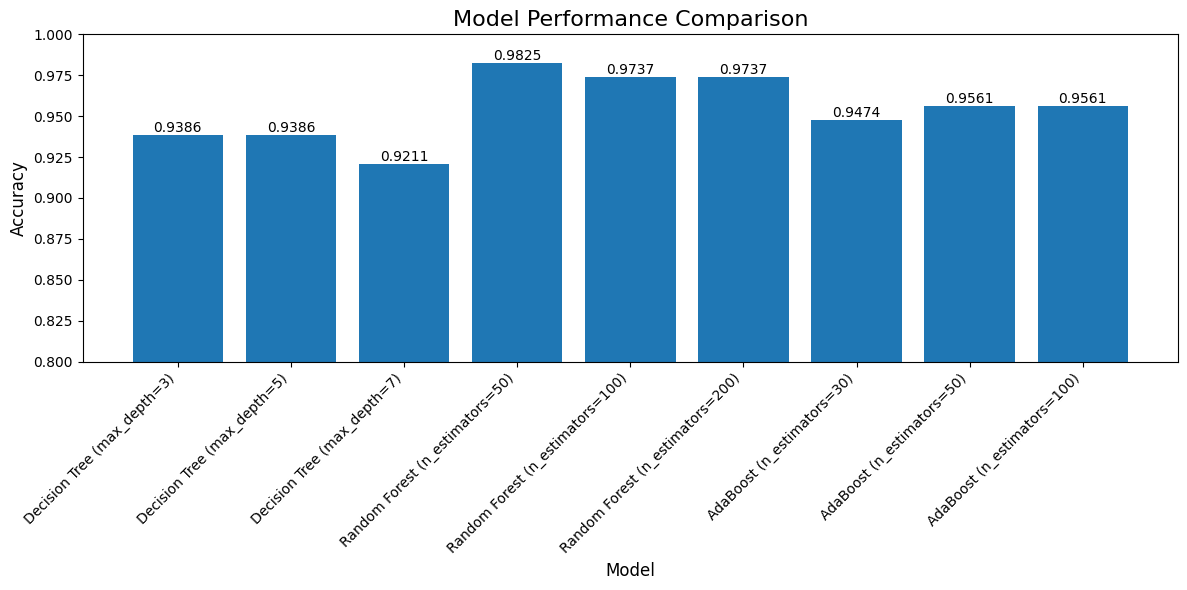


Best Performing Model: Random Forest (n_estimators=50) with Accuracy = 0.9825


In [36]:
# Visualize the results with improved scaling
plt.figure(figsize=(12, 6))
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Collect all results for plotting
all_models = dt_models + rf_models + adaboost_models
all_results = dt_results + rf_results + adaboost_results

# Prepare data for plotting
model_names = [name for name, _ in all_models]
accuracies = [accuracy for _, accuracy in all_results]

# Create bar plot with better visualization
plt.bar(model_names, accuracies)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# Adjust y-axis to start from a lower value to emphasize differences
plt.ylim(0.8, 1.0)  # Adjust these values as needed

plt.tight_layout()
plt.show()

# Find the best performing model
best_model = max(all_results, key=lambda x: x[1])
print(f"\nBest Performing Model: {best_model[0]} with Accuracy = {best_model[1]:.4f}")